# Data 2023

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import glob
import re

In [18]:
birds = ['P168', 'P423', 'P498', 'P787', 'P796', 'P875']
pair_1_files = glob.glob(f'data_2023/*_0_*.csv')
pair_2_files = glob.glob(f'data_2023/*_1_*.csv')
pair_3_files = glob.glob(f'data_2023/*_2_*.csv')
pair_4_files = glob.glob(f'data_2023/*_3_*.csv')
pair_5_files = glob.glob(f'data_2023/*_4_*.csv')
pair_6_files = glob.glob(f'data_2023/*_5_*.csv')

print(len(pair_1_files))
print(len(pair_2_files))
print(len(pair_3_files))
print(len(pair_4_files))
print(len(pair_5_files))
print(len(pair_6_files))

215
215
217
213
215
216


In [19]:
dfs_p1 = [pd.read_csv(filename) for filename in pair_1_files]
dfs_p2 = [pd.read_csv(filename) for filename in pair_2_files]
dfs_p3 = [pd.read_csv(filename) for filename in pair_3_files]
dfs_p4 = [pd.read_csv(filename) for filename in pair_4_files]
dfs_p5 = [pd.read_csv(filename) for filename in pair_5_files]
dfs_p6 = [pd.read_csv(filename) for filename in pair_6_files]

big_frame_p1 = pd.concat(dfs_p1, ignore_index=True)
big_frame_p2 = pd.concat(dfs_p2, ignore_index=True)
big_frame_p3 = pd.concat(dfs_p3, ignore_index=True)
big_frame_p4 = pd.concat(dfs_p4, ignore_index=True)
big_frame_p5 = pd.concat(dfs_p5, ignore_index=True)
big_frame_p6 = pd.concat(dfs_p6, ignore_index=True)

big_frame_list = [big_frame_p1, big_frame_p2, big_frame_p3, big_frame_p4, big_frame_p5, big_frame_p6]

## Matching Law

### Responses

In [20]:
ratio_RR_RI_response_list = []
for df in big_frame_list:
    resp_RI = df["resp_RI"]
    resp_RR = df["resp_RR"]

    ratio_RR_RI_response = resp_RR.sum()/resp_RI.sum()    
    ratio_RR_RI_response_list.append(ratio_RR_RI_response)
    print(resp_RI.sum())
    print(resp_RR.sum())

print(ratio_RR_RI_response_list)

79427
7544
156610
42121
37582
94436
75553
9434
149528
42124
22542
96153
[0.09498029637276996, 0.268954728305983, 2.512798680219254, 0.12486598811430387, 0.28171312396340487, 4.2655043918019695]


In [21]:
ratio_RR_RI_reward_list = []
for df in big_frame_list:
    reward_RI = df["reward_RI"]
    reward_RR = df["reward_RR"]

    ratio_RR_RI_reward = reward_RR.sum()/( reward_RI.sum())
    ratio_RR_RI_reward_list.append(ratio_RR_RI_reward)

print(ratio_RR_RI_reward_list)

[0.0038910505836575876, 0.0762556315701652, 10.379679144385026, 0.007727487777953004, 0.07768456375838927, 15.96042216358839]


In [22]:
log_ratio_RR_RI_response_list = np.log10(ratio_RR_RI_response_list)
log_ratio_RR_RI_reward_list = np.log10(ratio_RR_RI_reward_list)

X = np.array(log_ratio_RR_RI_reward_list).reshape(-1, 1)
y = np.array(log_ratio_RR_RI_response_list)

reg = LinearRegression().fit(X, y)
sen = reg.coef_[0]
bias = np.exp(reg.intercept_)

print(f"Sensitivity \n{sen:0.4f}")
print(f"Bias \n{bias:0.04f}")

Sensitivity 
0.4456
Bias 
1.0004


### Time

In [23]:
def get_times(l):
    visit_time = []
    for i in range(len(l)):

        if l[i] > l[i-1] and l[i+1] == 0:
            visit_time.append(l[i])
    
    return visit_time

In [24]:
list_times = []
list_rewards = []
count = 1

for df in big_frame_list:
    time_RI = df["visit_lenght_time_RI"].to_numpy()
    time_RR = df["visit_lenght_time_RR"].to_numpy()

    time_RI = np.append(time_RI, 0)
    time_RR = np.append(time_RR, 0)

    reward_RI_time = df["reward_RI"].to_numpy()
    reward_RR_time = df["reward_RR"].to_numpy()

    time_visit_RI = get_times(time_RI)
    time_visit_RR = get_times(time_RR)

    ratio_RR_RI_time = np.log10(np.sum(time_visit_RR)/np.sum(time_visit_RI))
    ratio_RR_RI_time_reward = np.log10(np.sum(reward_RR_time)/np.sum(reward_RI_time))

    list_times.append(ratio_RR_RI_time)
    list_rewards.append(ratio_RR_RI_time_reward)

    count += 1

list_times = np.array(list_times)
list_rewards = np.array(list_rewards)

print(list_times)
print(list_rewards)

[-0.84049833 -0.60860798  0.17253973 -0.68172163 -0.54863313  0.32221562]
[-2.40993312 -1.11772808  1.01618393 -2.11196167 -1.10966527  1.20304437]


In [25]:
X = list_rewards.reshape(-1, 1)
y = list_times

reg = LinearRegression().fit(X, y)
sen_t = reg.coef_[0]
bias_t = np.exp(reg.intercept_)

print(f"Sensitivity, s: {sen_t:0.4f}")
print(f"Log-Bias, b: {bias_t:0.04f}")

Sensitivity, s: 0.3106
Log-Bias, b: 0.8784


In [26]:
# File to save
dir = 'Figures_2023/'

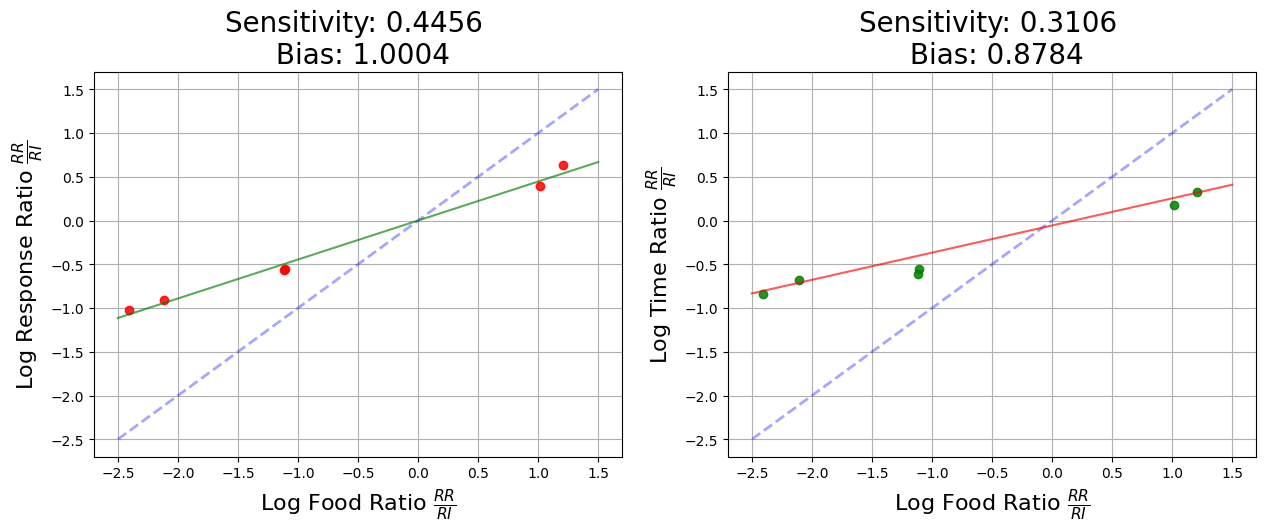

In [27]:
# Plot the Log food ratio vs Log response ratio  and log food ratio vs log time ratio and the
# estimated sensitivity and bias from the generalized matching law

fig, ax = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)

ax[0].plot(log_ratio_RR_RI_reward_list, log_ratio_RR_RI_response_list, 'o', alpha = 0.85, color = 'red')
ax[0].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50), '--', alpha = 0.35, color = 'blue', lw = 2)
ax[0].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50)*sen + np.log10(bias), '-', alpha = 0.65, color = 'green', lw = 1.5)
ax[0].grid()
ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Sensitivity: {sen:0.4f} \n Bias: {bias:0.04f}", fontsize=20)

ax[1].plot(list_rewards, list_times, 'o', alpha = 0.85, color = 'green')
ax[1].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50), '--', alpha = 0.35, color = 'blue', lw = 2)
ax[1].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50)*sen_t + np.log10(bias_t), '-', alpha = 0.65, color = 'red', lw = 1.5)
ax[1].grid()
ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Sensitivity: {sen_t:0.4f} \n Bias: {bias_t:0.04f}", fontsize=20)

plt.savefig(dir + 'fig_1.png', dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Matching reinforcement by reinforcement

In [28]:
# Check the lenght of the dataframes, different lenghts means nonindentical durations of the pair during the session (what it's expected).

print(big_frame_p1.shape)
print(big_frame_p2.shape)
print(big_frame_p3.shape)
print(big_frame_p4.shape)
print(big_frame_p5.shape)
print(big_frame_p6.shape)

(87186, 17)
(198946, 17)
(132235, 17)
(85200, 17)
(191867, 17)
(118911, 17)


In [29]:
# Check the number of rewards in each pair
print(big_frame_p1["reward_RI"].sum() + big_frame_p1["reward_RR"].sum())
print(big_frame_p2["reward_RI"].sum() + big_frame_p2["reward_RR"].sum())
print(big_frame_p3["reward_RI"].sum() + big_frame_p3["reward_RR"].sum())
print(big_frame_p4["reward_RI"].sum() + big_frame_p4["reward_RR"].sum())
print(big_frame_p5["reward_RI"].sum() + big_frame_p5["reward_RR"].sum())
print(big_frame_p6["reward_RI"].sum() + big_frame_p6["reward_RR"].sum())

6450
6450
6384
6390
6423
6428


In [30]:
# We create a new dataframe with the sum of the rewards for each pair (every df has aggregated information 
# of the pigeons and session that correspond the particular pair number).
new_big_df = {}
count = 0
for df in big_frame_list:
    new_df = df.copy()
    new_df["Sum_reward"] = new_df["reward_RI"] + new_df["reward_RR"]
    new_big_df[f"pair{count}"] = new_df
    count += 1

In [31]:
def get_index_number_reward(df: dict, number_reward:list) -> dict:
    """ 
    This function return the index where the n-th reward was obtained for a given pair, session and bird.

    The input is a dictionary with the dataframes for each pair.
    
    Return an python dictionary with the indices for each pair, session and bird.
    """
    
    index_dict = {}
    for dframe in df.keys():

        for session in df[dframe]["session"].unique():

            for bird in df[dframe][df[dframe]["session"] == session].bird.unique():

                index_list = []

                dataf = df[dframe][(df[dframe]["session"] == session) & (df[dframe]["bird"] == bird)].copy()
                dataf = dataf.reset_index(drop=True, inplace=False)
                
                pair = dataf.pair.unique()[0]
                rewards = dataf["Sum_reward"].to_numpy()
                cumsum_rewards = np.cumsum(rewards)

                for number in number_reward:
                    if number <= np.max(cumsum_rewards):
                        index = np.where(cumsum_rewards == number)[0][0]
                        index_list.append(index)
                    else:
                        pass
                
                index_dict[f"pair{pair}_session_{session}_bird_{bird}"] = index_list

    return index_dict


In [32]:
number_rewards = range(1, 31)

index_dict = get_index_number_reward(new_big_df, number_rewards)
print(index_dict.keys())
print(len(index_dict.keys()))

dict_keys(['pair0_session_S79_bird_P507', 'pair0_session_S79_bird_P892', 'pair0_session_S79_bird_P696', 'pair0_session_S79_bird_P007', 'pair0_session_S79_bird_P450', 'pair0_session_S79_bird_P502', 'pair0_session_S79_bird_P767', 'pair0_session_S79_bird_P183', 'pair0_session_S40_bird_P767', 'pair0_session_S40_bird_P502', 'pair0_session_S40_bird_P696', 'pair0_session_S40_bird_P507', 'pair0_session_S40_bird_P183', 'pair0_session_S40_bird_P892', 'pair0_session_S40_bird_P007', 'pair0_session_S40_bird_P450', 'pair0_session_S51_bird_P450', 'pair0_session_S51_bird_P007', 'pair0_session_S51_bird_P183', 'pair0_session_S51_bird_P696', 'pair0_session_S51_bird_P502', 'pair0_session_S51_bird_P892', 'pair0_session_S51_bird_P767', 'pair0_session_S51_bird_P507', 'pair0_session_S82_bird_P767', 'pair0_session_S82_bird_P696', 'pair0_session_S82_bird_P892', 'pair0_session_S82_bird_P450', 'pair0_session_S82_bird_P183', 'pair0_session_S82_bird_P007', 'pair0_session_S82_bird_P507', 'pair0_session_S82_bird_P502

In [33]:
a = []
for key in index_dict.keys():
    a.append(len(index_dict[key]))

print(len(np.where(np.array(a) < 30)[0]))

18


In [34]:
def get_data_between_rewards(df: pd.DataFrame,  pair: int, index_dict: dict, from_reward: int, to_reward: int) -> pd.DataFrame:
    """
    The function return a `pandas.DataFrame` with the data between the j-th y n-th reward for a given pair.

    Input is a dictionary with the indices for each pair, session and bird; the pair number, the j-th and n-th reward.

    Return a `pandas.DataFrame` with the data before the j-th y n-th reward for a given pair.
    """
    
    dfs = []
    pair_x_by_session_and_pigeon = []

    # Here we get the index for the n-th reward in each pair, session and pigeon.
    for i in index_dict.keys():
        exist_pair = re.findall(f'pair{pair}_\w+', i)

        if bool(exist_pair):
            pair_x_by_session_and_pigeon.extend(exist_pair)

    # Iteration over every session and pigeon for a given pair, and get the data between the j-th and n-th reward, to later concatenate all the dataframes.
    # The concatenation is done in order to get the data between the j-th and n-th reward for a given pair.
    
    for pair_session_bird in pair_x_by_session_and_pigeon:

        ses = re.findall(r"S\d+", pair_session_bird)[0]
        pigeon = re.findall(r"P\d+", pair_session_bird)[0]

        if len(index_dict[pair_session_bird]) < 30: 

            continue
        
        else:
            
            if to_reward == 1 and from_reward == 0:
                to_x_reinforcement = index_dict[pair_session_bird][0] - 1
                
                n = df[(df["session"] == ses) & (df["bird"] == pigeon)].copy()
                
                n.reset_index(inplace=True)
                
                n_final = n.loc[:to_x_reinforcement].copy()

                dfs.append(n_final)

            else:
                from_x_reinforcement = index_dict[pair_session_bird][from_reward-1] + 1
                to_x_reinforcement = index_dict[pair_session_bird][to_reward-1] - 1

                        
                n = df[(df["session"] == ses) & (df["bird"] == pigeon)].copy()
                
                n.reset_index(inplace=True)
                
                n_final = n.loc[from_x_reinforcement:to_x_reinforcement].copy()

                dfs.append(n_final)

            df_concat = pd.concat(dfs, ignore_index=True)

    return df_concat

In [35]:
from_reward = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
to_reward = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]

pairs = [0, 1, 2, 3, 4, 5]

In [36]:
ratios = {}

for pair in pairs:
    
    ratio_list_RL = []

    for from_r, to_r in zip(from_reward, to_reward):
        
        df = get_data_between_rewards(new_big_df[f"pair{pair}"], pair, index_dict, from_r, to_r)

        ratio_LR = np.log10(df["resp_RR"].sum() / df["resp_RI"].sum())
        ratio_list_RL.append(ratio_LR)

    ratios[f"pair{pair}_from0_to_30"] = ratio_list_RL

In [37]:
response_evolution = []

for i in range(14):
    mini_list = []
    for key in ratios.keys():
        mini_list.append(ratios[key][i])
    response_evolution.append(mini_list)

## Plots

In [38]:
# Plot the Log food ratio vs Log response ratio  and log food ratio vs log time ratio and the
# estimated sensitivity and bias from the generalized matching law
count = 0
X = list_rewards.reshape(-1, 1)

for i in range(7):
    fig, ax = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)

    y = response_evolution[count]
    reg = LinearRegression().fit(X, y)
    sen_t = reg.coef_[0]
    bias_t = reg.intercept_


    ax[0].plot(list_rewards, response_evolution[count], 'o', alpha = 0.85, color = 'red')
    ax[0].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50), '--', alpha = 0.35, color = 'blue', lw = 2)
    ax[0].plot(np.linspace(-2.5,1.5,50), np.linspace(-2.5,1.5,50)*sen_t + bias_t, '-', alpha = 0.65, 
               color = 'green', lw = 1.5, label=f"Sensitivity: {sen_t:0.4f} \n Bias: {np.exp(bias_t):0.04f}")
    ax[0].grid()

    ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[0].set_title(f"Between {from_reward[count]}th and {to_reward[count]}th Reinforcer", fontsize=20)
    ax[0].legend()

    count += 1
    ######################################################################################
    ######################################################################################

    y = response_evolution[count]
    reg = LinearRegression().fit(X, y)
    sen_t_2 = reg.coef_[0]
    bias_t_2 = reg.intercept_

    ax[1].plot(list_rewards, response_evolution[count], 'o', alpha = 0.85, color = 'green')
    
    ax[1].plot(np.linspace(-2.5,1.5,50), 
               np.linspace(-2.5,1.5,50), '--', 
               alpha = 0.35, color = 'blue', lw = 2)
    
    ax[1].plot(np.linspace(-2.5,1.5,50), 
               np.linspace(-2.5,1.5,50)*sen_t_2 + bias_t_2, '-', alpha = 0.65, 
               color = 'red', lw = 1.5, 
               label = f"Sensitivity: {sen_t_2:0.4f} \n Bias: {np.exp(bias_t_2):0.04f}")

    ax[1].grid()

    ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[1].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[1].set_title(f"Between {from_reward[count]}th and {to_reward[count]}th Reinforcer", fontsize=20)
    ax[1].legend()

    count += 1
    plt.savefig(dir + f"Figure_from{from_reward[count-2]}th_to_{to_reward[count-1]}th.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)

# Bayesian Analysis

## Data and Classical Linear Regression

In [39]:
from_reward = [21]
to_reward = [30]

pairs = [0, 1, 2, 3, 4, 5]

In [67]:
ratios_l = {}
ratios_l_time = {}

for pair in pairs:
    
    for from_r, to_r in zip(from_reward, to_reward):
        
        df = get_data_between_rewards(new_big_df[f"pair{pair}"], pair, index_dict, from_r, to_r)

        time_RI = df["visit_lenght_time_RI"].to_numpy()
        time_RR = df["visit_lenght_time_RR"].to_numpy()

        time_RI = np.append(time_RI, 0)
        time_RR = np.append(time_RR, 0)

        time_visit_RI = get_times(time_RI)
        time_visit_RR = get_times(time_RR)

        ratio_LR = np.log10(df["resp_RR"].sum() / df["resp_RI"].sum())
        ratio_LR_time = np.log10(np.sum(time_visit_RR)/np.sum(time_visit_RI))

    ratios_l[f"pair{pair}_from21_to_30"] = ratio_LR
    ratios_l_time[f"pair{pair}_from21_to_30"] = ratio_LR_time

In [69]:
response_reinforcers_21_30 = []
time_reinforcers_21_30 = []

for key in ratios_l.keys():
    response_reinforcers_21_30.append(ratios_l[key])

for key in ratios_l_time.keys():
    time_reinforcers_21_30.append(ratios_l_time[key])

print(response_reinforcers_21_30)
print(time_reinforcers_21_30)

[-1.425357727182298, -0.6501128716690974, 0.9205676589121564, -1.3383057499205882, -0.6892807841216354, 1.3233566087497877]
[-1.796909676726551, -0.8166917417105017, 0.8432919160684196, -1.4186948594691524, -0.9389730077636396, 1.078288522331082]


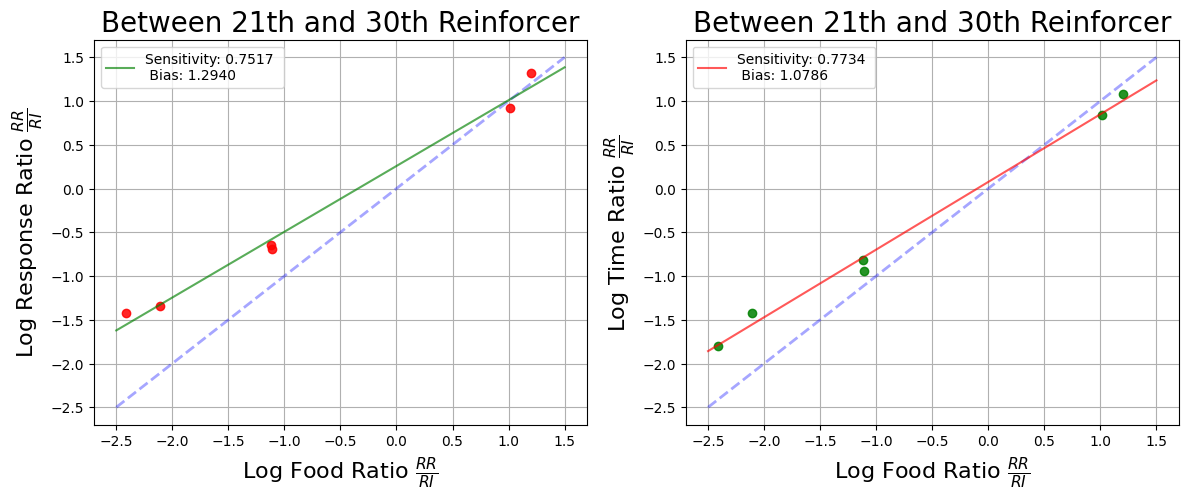

In [74]:
fig, ax = plt.subplots(figsize = (14, 5), ncols=2, nrows=1)

# Plot Response Ratio
################################################################################################################################################################################################################################################################################################
X = list_rewards.reshape(-1, 1)
x = np.linspace(-2.5,1.5,50)
y = np.array(response_reinforcers_21_30)

reg = LinearRegression().fit(X, y)
sen_t = reg.coef_[0]
bias_t = reg.intercept_


ax[0].plot(list_rewards, response_reinforcers_21_30, 'o', alpha = 0.85, color = 'red')
ax[0].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[0].plot(x, x*sen_t + bias_t, '-', alpha = 0.65, color = 'green', lw = 1.5, 
        label=f"Sensitivity: {sen_t:0.4f} \n Bias: {np.exp(bias_t):0.04f}")
ax[0].grid()

ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Between 21th and 30th Reinforcer", fontsize=20)
ax[0].legend()

# Plot Time Ratio
############################################################################################################################################################################################################################################

X = list_rewards.reshape(-1, 1)
x = np.linspace(-2.5,1.5,50)
y = np.array(time_reinforcers_21_30)

reg = LinearRegression().fit(X, y)
sen_t = reg.coef_[0]
bias_t = reg.intercept_


ax[1].plot(list_rewards, time_reinforcers_21_30, 'o', alpha = 0.85, color = 'green')
ax[1].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[1].plot(x, x*sen_t + bias_t, '-', alpha = 0.65, color = 'red', lw = 1.5, 
        label=f"Sensitivity: {sen_t:0.4f} \n Bias: {np.exp(bias_t):0.04f}")
ax[1].grid()

ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Between 21th and 30th Reinforcer", fontsize=20)
ax[1].legend()

plt.savefig(dir + f"Figure_21th_to_30th.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()
#plt.close(fig)

# Bayesian Linear Regression: Responses

In [43]:
import stan
import nest_asyncio
nest_asyncio.apply()

In [89]:
model = """
data{
    int<lower = 0> N;  // Number of Observations
    vector[N] x; // Features;
    vector[N] y; // Targets;
}
parameters{
  real b0; // Intercept
  real b1; // Slope

  real<lower=0> sigma;  // error scale

}

model{

// Priors Slope and Intercept
    b0 ~ normal(0, 10); // Intercept
    b1 ~ normal(0, 10); // Slope

//Prior SD
    sigma ~ lognormal(0, 1);

// Likelihood
    y ~ normal(b0 + x * b1, sigma);
}

generated quantities{
    vector[N] log_lik;
    vector[N] y_hat;

    for (i in 1:N){
        log_lik[i] = normal_lpdf(y[i] | b0 + b1 * x[i], sigma);
        y_hat[i] = normal_rng(b0 + b1 * x[i], sigma);
    }
}
"""

In [87]:
data_model_responses = {"N": len(response_reinforcers_21_30), 
              "x": list_rewards,
              "y": response_reinforcers_21_30}

In [88]:
data_model_time = {"N": len(time_reinforcers_21_30), 
              "x": list_rewards,
              "y": time_reinforcers_21_30}

In [92]:
stan_model_responses = stan.build(model, data=data_model_responses, random_seed=140801)
stan_model_time = stan.build(model, data=data_model_time, random_seed=101401)

Building...



Building: found in cache, done.

Building...



Building: found in cache, done.

In [93]:
fit = stan_model_responses.sample(num_chains=4, num_samples=70000, num_warmup=55000)
fit_time = stan_model_time.sample(num_chains=4, num_samples=70000, num_warmup=55000)

Sampling:   0%
Sampling:  25% (125000/500000)
Sampling:  50% (250000/500000)
Sampling:  75% (375000/500000)
Sampling: 100% (500000/500000)
Sampling: 100% (500000/500000), done.
Messages received during sampling:
  Gradient evaluation took 0.000259 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.59 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
Sampling:   0%
Sampling:  25% (125000/500000)
Sampling:  50% (250000/500000)
Sampling:  75% (375000/500000)
Sampling: 100% 

In [96]:
bayes = fit.to_frame()
para_list_names = bayes.columns[7:10]
print(para_list_names)
bayes.head()

Index(['b0', 'b1', 'sigma'], dtype='object', name='parameters')


parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,b0,b1,sigma,...,log_lik.3,log_lik.4,log_lik.5,log_lik.6,y_hat.1,y_hat.2,y_hat.3,y_hat.4,y_hat.5,y_hat.6
draws,,,,,,,,,,,,,,,,,,,,,
0,6.672885,0.049511,0.429218,2.0,3.0,0.0,-4.420441,0.254312,0.754290,0.098520,...,0.880925,1.398549,0.813364,0.053306,-1.462281,-0.535906,0.853350,-1.137290,-0.493925,1.149992
1,6.004570,0.992099,0.348756,3.0,7.0,0.0,-5.507682,0.309851,0.805905,0.124542,...,-0.233573,1.070581,0.809804,1.101860,-1.520895,-0.470152,1.429441,-1.615227,-0.487743,1.051610
2,6.596119,0.997612,0.420683,2.0,3.0,0.0,-5.862530,0.243775,0.738479,0.195301,...,0.643193,0.707674,0.545134,0.235259,-1.537187,-0.862244,1.525974,-1.504249,-0.332114,1.007098
3,6.631470,0.967135,0.428027,3.0,7.0,0.0,-5.753687,0.208805,0.741343,0.114842,...,1.179719,1.232172,1.029481,-0.634674,-1.591047,-0.640918,0.848793,-1.225466,-0.732365,1.200392
4,6.752777,0.742979,0.429218,2.0,3.0,0.0,-5.128352,0.202762,0.731518,0.131512,...,1.090844,1.109285,0.923291,-0.563050,-1.353634,-0.720962,1.010017,-1.259736,-0.562938,1.126619


In [95]:
bayes_time = fit_time.to_frame()
para_list_names_time = bayes_time.columns[7:10]
print(para_list_names_time)
bayes_time.head()

Index(['b0', 'b1', 'sigma'], dtype='object', name='parameters')


parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,b0,b1,sigma,...,log_lik.3,log_lik.4,log_lik.5,log_lik.6,y_hat.1,y_hat.2,y_hat.3,y_hat.4,y_hat.5,y_hat.6
draws,,,,,,,,,,,,,,,,,,,,,
0,4.450366,0.892995,0.475452,3.0,7.0,0.0,-2.138947,0.235836,0.839469,0.139043,...,-0.505970,0.691512,-0.476653,0.328723,-1.797028,-0.723265,1.001856,-1.715867,-0.649610,1.094958
1,4.807659,0.968112,0.437060,3.0,7.0,0.0,-3.002607,0.239557,0.844766,0.159313,...,-0.360059,0.605877,-0.227418,0.296860,-1.876896,-0.803661,0.871614,-1.708445,-0.728493,1.521618
2,0.101444,0.853261,0.345381,4.0,15.0,0.0,1.435195,-0.160535,0.692539,0.807235,...,-0.773893,-0.736874,-0.704875,-0.831072,0.080338,-1.002071,0.818609,-1.327406,-0.369670,0.625081
3,6.434341,0.967149,0.381085,3.0,7.0,0.0,-5.854723,0.118280,0.760119,0.091182,...,1.340789,1.194854,-1.272317,1.351172,-1.658326,-0.738038,0.873282,-1.593728,-0.659579,0.860050
4,7.426247,0.359795,0.475452,2.0,3.0,0.0,-2.030829,0.066476,0.789202,0.149509,...,0.967304,0.243830,0.605184,0.894458,-1.860052,-0.838958,0.546808,-1.517064,-1.009073,0.951427


In [97]:
bayes.to_csv("bayes_responses_2022.csv")
bayes_time.to_csv("bayes_time_2022.csv")

## MCMC Diagnostics: Responses

In [99]:
import arviz as az

In [101]:
new_fit = az.convert_to_inference_data(fit)

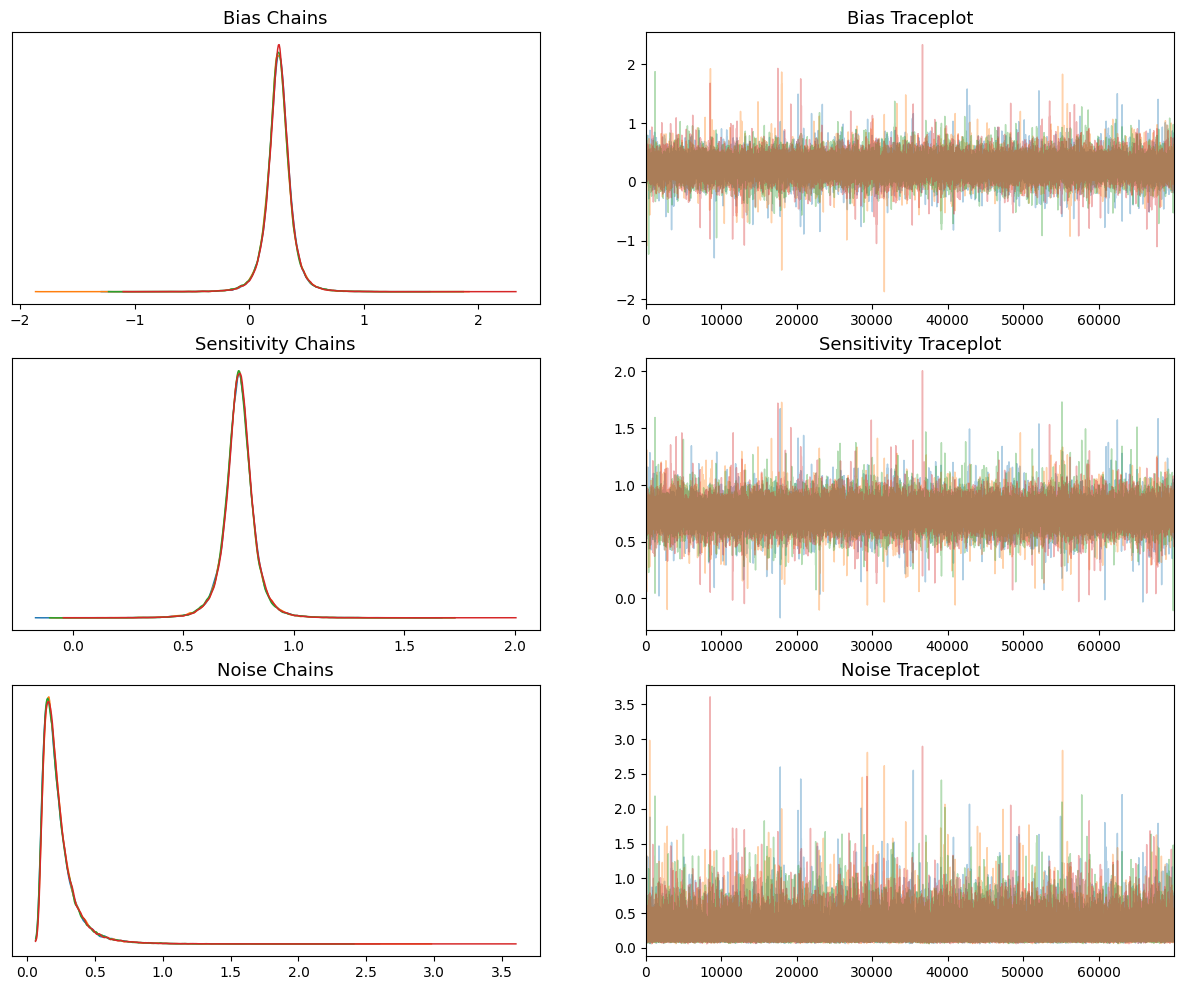

In [130]:
axes = az.plot_trace(fit, var_names=para_list_names, compact=False, figsize=(15, 12), combined=False)

axes[0,0].set_title("Bias Chains", fontsize=13)
axes[0,1].set_title("Bias Traceplot", fontsize=13)
axes[1,0].set_title("Sensitivity Chains", fontsize=13)
axes[1,1].set_title("Sensitivity Traceplot", fontsize=13)
axes[2,0].set_title("Noise Chains", fontsize=13)
axes[2,1].set_title("Noise Traceplot", fontsize=13)

plt.savefig(dir + "Traceplot_responses_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

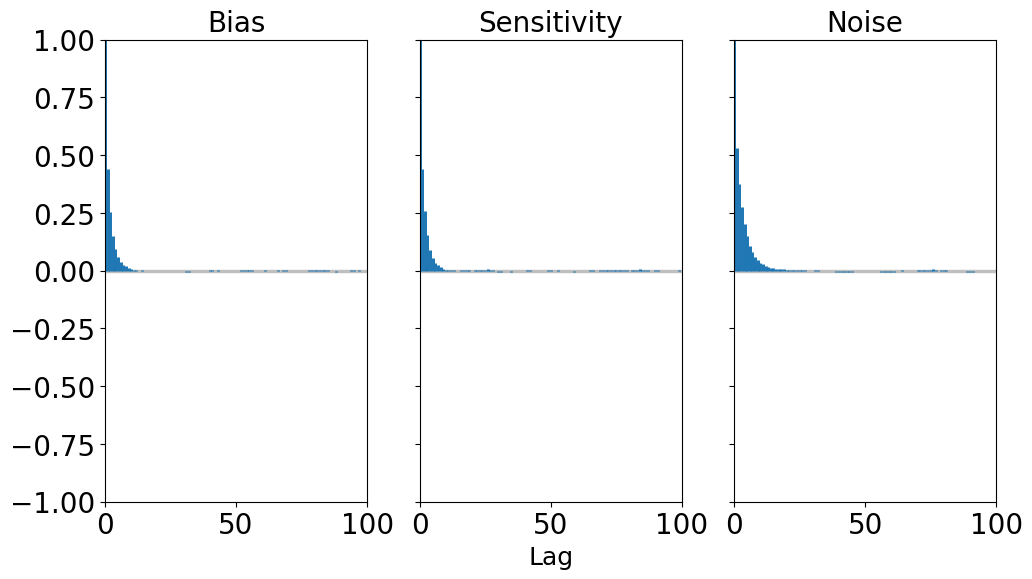

In [103]:
axes = az.plot_autocorr(fit, var_names=para_list_names, figsize=(11.5, 6), combined=True, textsize=20, max_lag=100);

axes[0].set_title('Bias', fontsize=20)
axes[1].set_title('Sensitivity', fontsize=20)
axes[2].set_title('Noise', fontsize=20)
axes[1].set_xlabel('Lag', fontsize=18)

plt.savefig(dir + "Autocorrelation_responses_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

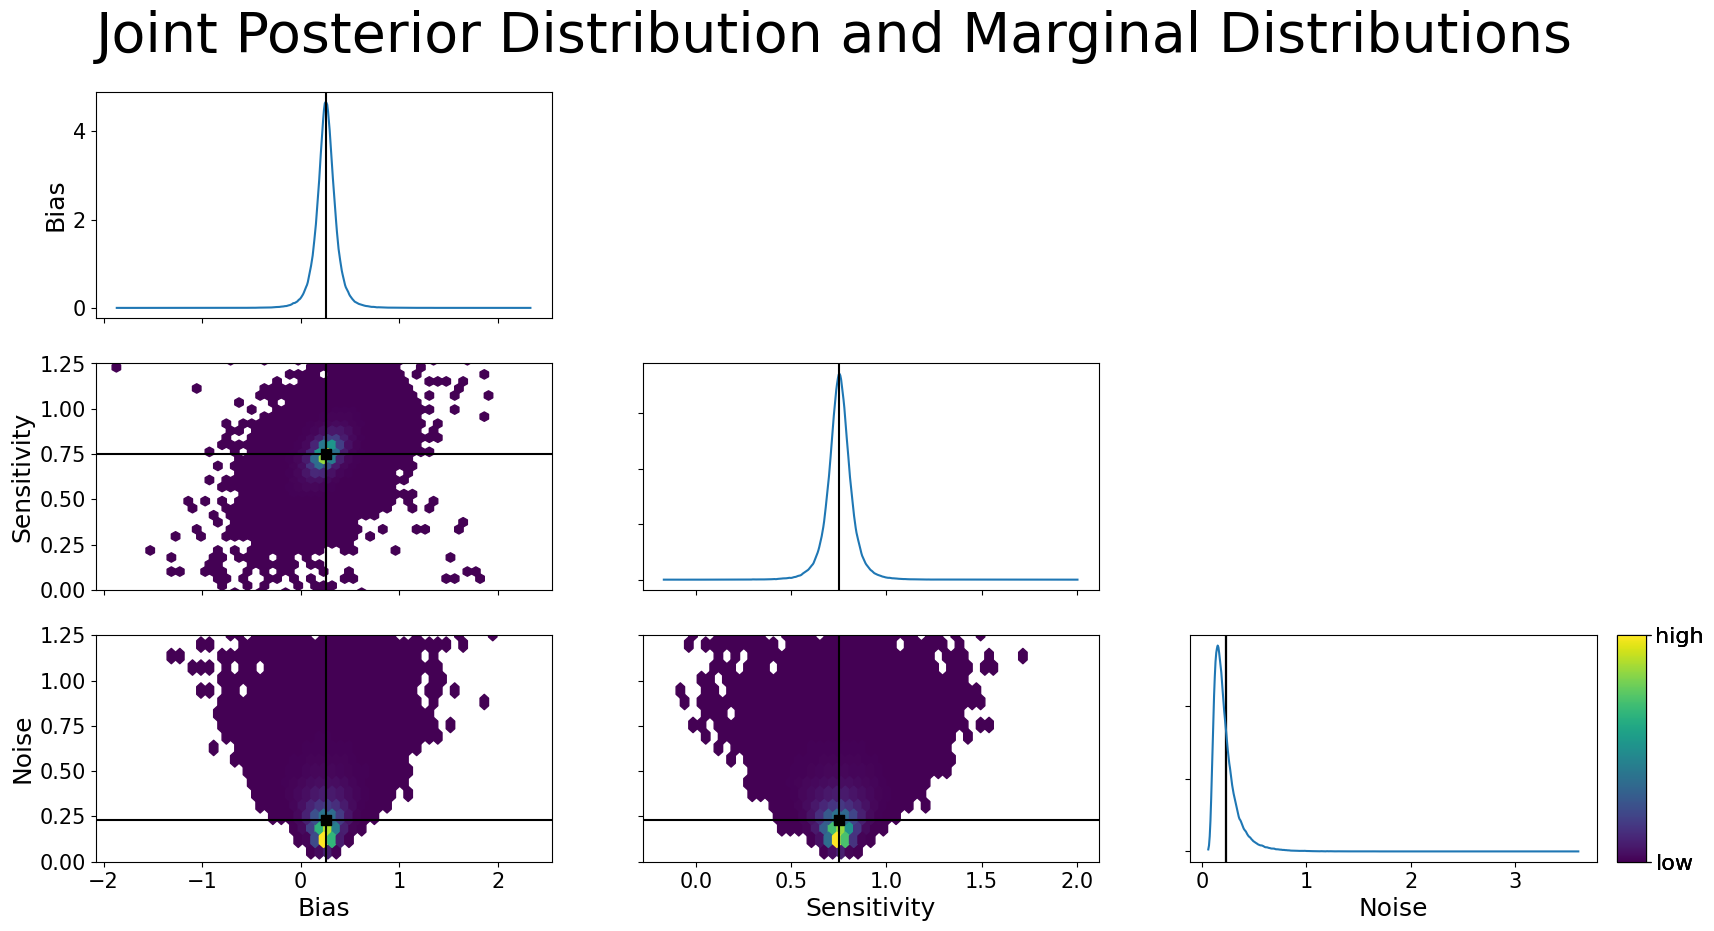

In [123]:
axes = az.plot_pair(new_fit, var_names=para_list_names, figsize=(20, 10), divergences=True, 
             kind='hexbin', textsize=15, colorbar=True, point_estimate='mean', marginals=True)
axes[1, 0].set_ylim(0, 1.25)
axes[2, 0].set_ylim(0, 1.25)
axes[0,0].set_title("Joint Posterior Distribution and Marginal Distributions", fontsize=40, pad=20, loc = "left", verticalalignment="bottom")
axes[0, 0].set_ylabel('Bias', fontsize=18)
axes[1, 0].set_ylabel('Sensitivity', fontsize=18)
axes[2, 0].set_ylabel('Noise', fontsize=18)
axes[2, 0].set_xlabel('Bias', fontsize=18)
axes[2, 1].set_xlabel('Sensitivity', fontsize=18)
axes[2, 2].set_xlabel('Noise', fontsize=18)

plt.savefig(dir + "Joint_Posterior_Distribution_and_Marginal_Distributions_Responses.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

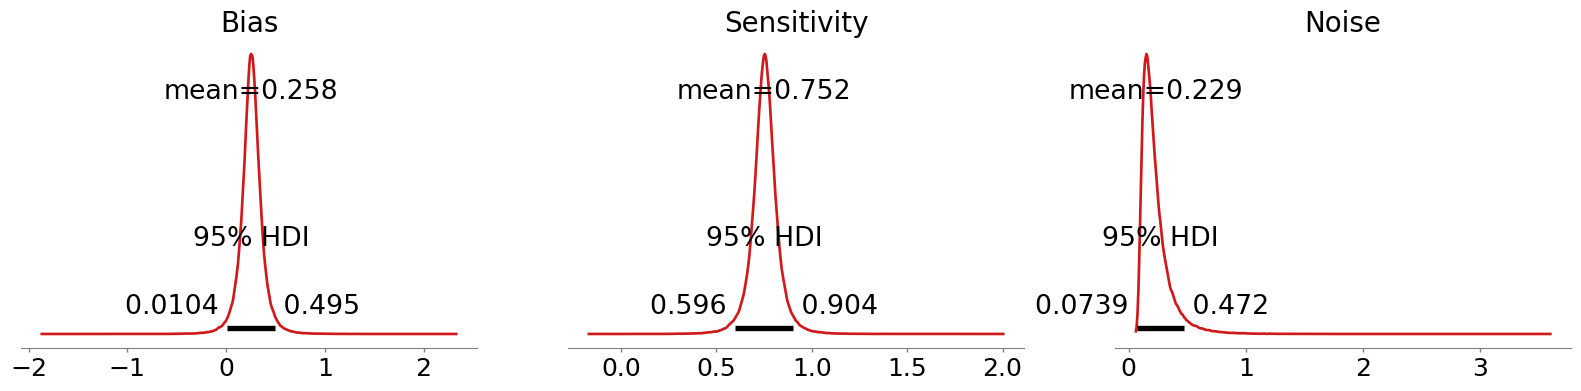

In [105]:
axes = az.plot_posterior(new_fit, var_names=para_list_names, figsize=(20, 4), kind='kde', hdi_prob=0.95, textsize=18, point_estimate='mean', round_to=3, color = "#CF191A");

axes[0].set_title("Bias", size=20)
axes[1].set_title("Sensitivity", size=20)
axes[2].set_title("Noise", size=20)
plt.savefig(dir + "Posterior_Distributions.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

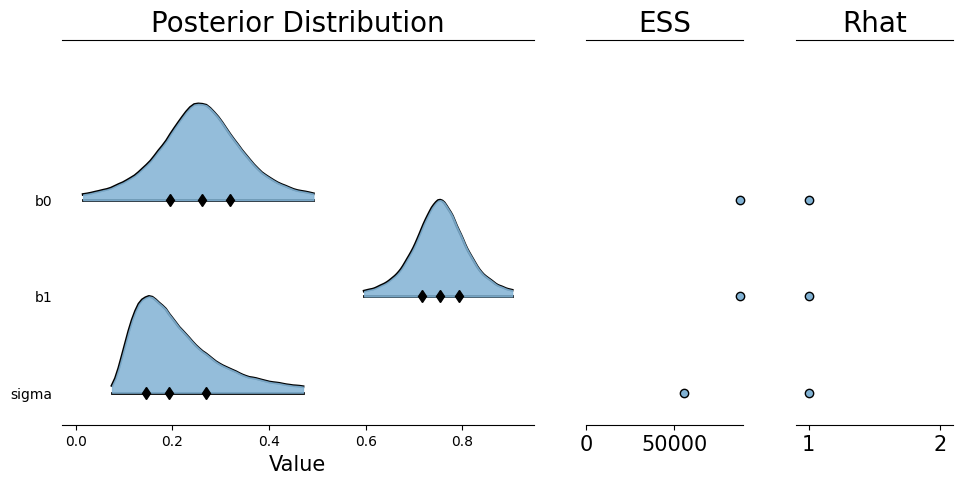

In [106]:
axes = az.plot_forest(new_fit, var_names=para_list_names, figsize=(11.5, 5), kind='ridgeplot',
               colors = '#81B2D4', ess=True, r_hat=True, combined=True, ridgeplot_overlap=1.35, textsize=15, hdi_prob=0.95, quartiles=True, linewidth=2, markersize=6, legend=True, ridgeplot_alpha= 0.85, ridgeplot_quantiles=[0.25, 0.5, 0.75],
               ridgeplot_truncate=True)
axes[0].set_title('Posterior Distribution', fontsize=20)
axes[0].set_xlabel('Value', fontsize=15)
axes[1].set_title('ESS', fontsize=20)
axes[2].set_title('Rhat', fontsize=20)

plt.savefig(dir + "Posterior_Distributions_and_statistics.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

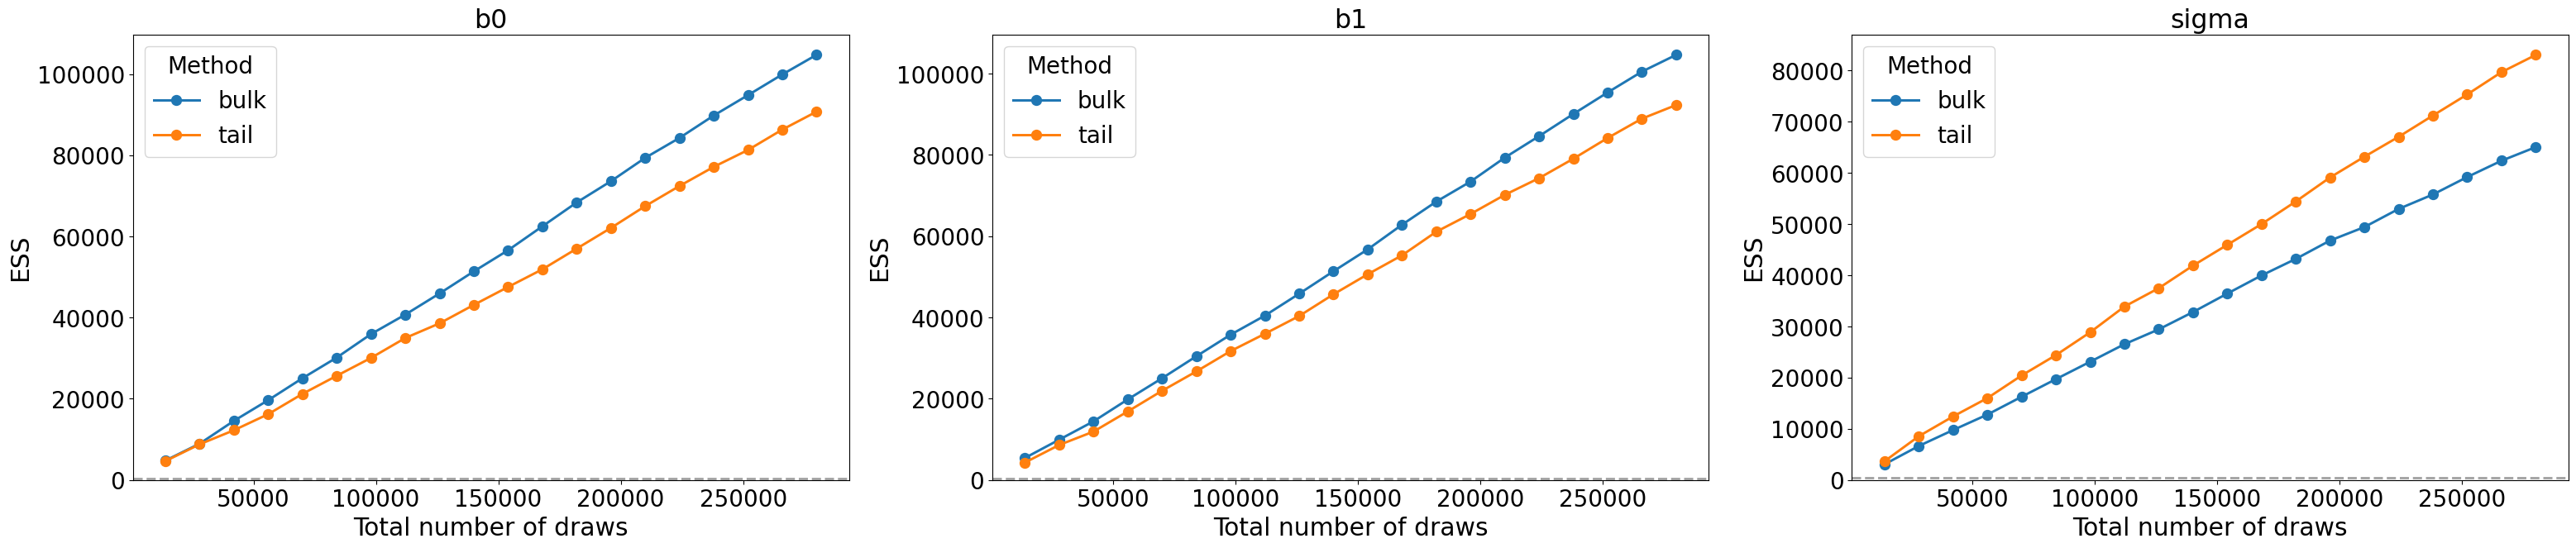

In [133]:
az.plot_ess(new_fit, var_names=para_list_names, figsize=(38, 7), 
            kind="evolution", relative=False, textsize=20)

plt.savefig(dir + "Effective_Sample_Size.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

## MCMC Diagnostics: Time

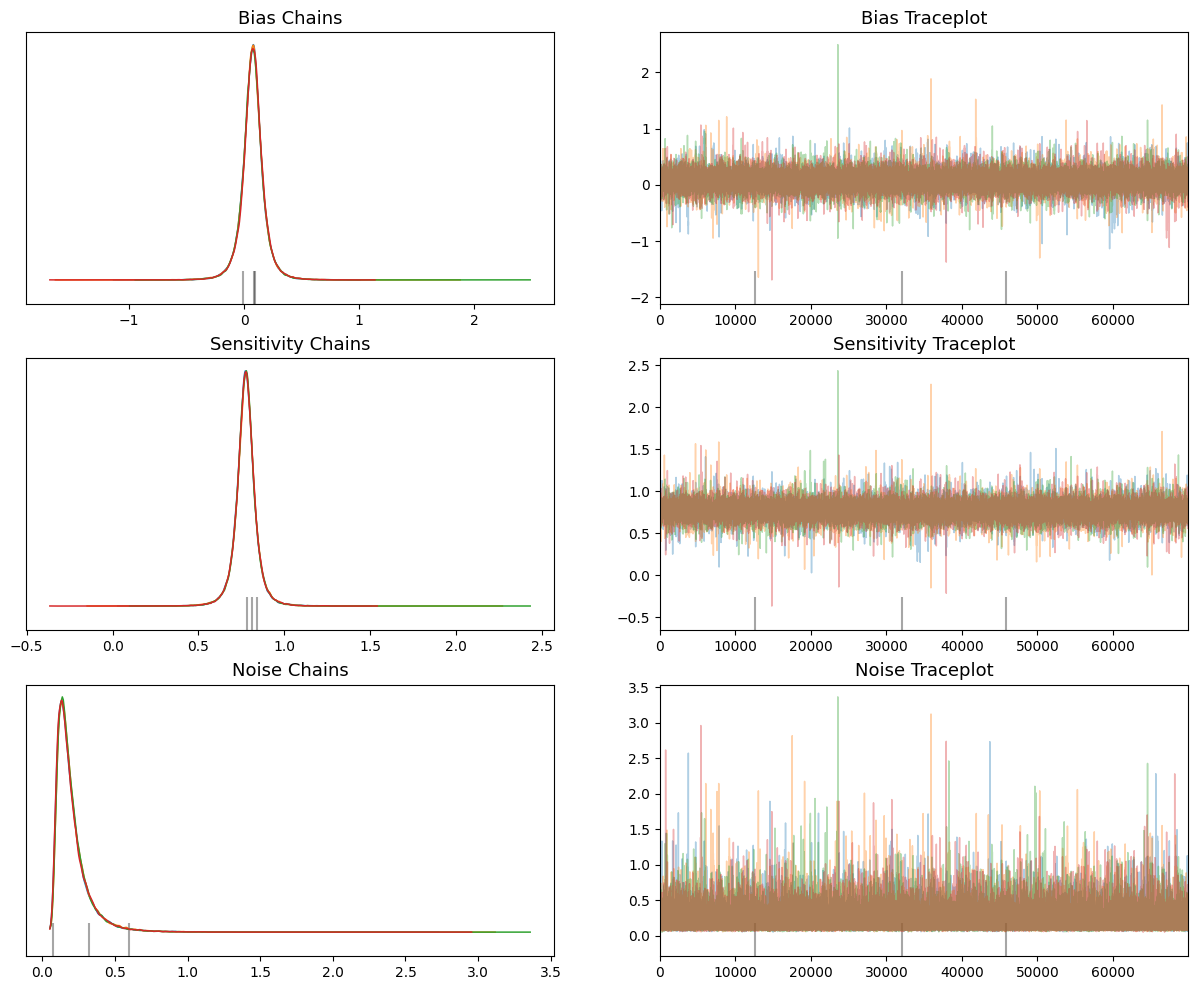

In [129]:
axes1 = az.plot_trace(fit_time, var_names=para_list_names_time, compact=False, figsize=(15, 12),
                     combined= False)

axes1[0,0].set_title("Bias Chains", fontsize=13)
axes1[0,1].set_title("Bias Traceplot", fontsize=13)
axes1[1,0].set_title("Sensitivity Chains", fontsize=13)
axes1[1,1].set_title("Sensitivity Traceplot", fontsize=13)
axes1[2,0].set_title("Noise Chains", fontsize=13)
axes1[2,1].set_title("Noise Traceplot", fontsize=13)

plt.savefig(dir + "Traceplot_time_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

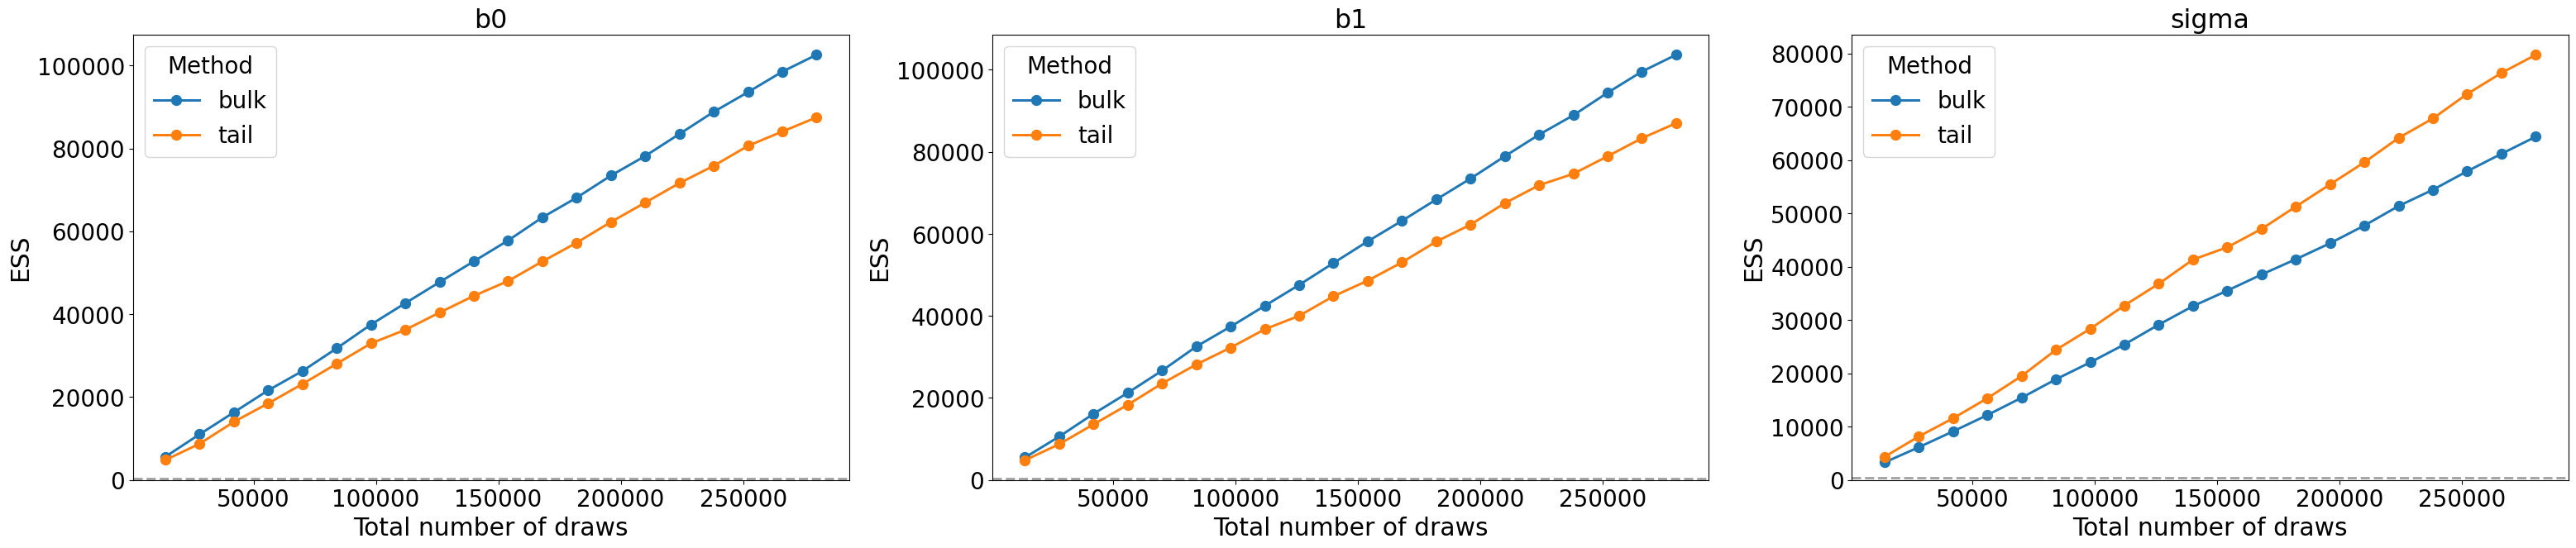

In [132]:
az.plot_ess(fit_time, var_names=para_list_names_time, figsize=(38, 7), 
            kind="evolution", relative=False, textsize=20)

plt.savefig(dir + "Effective_Sample_Size_Time.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)

plt.show()

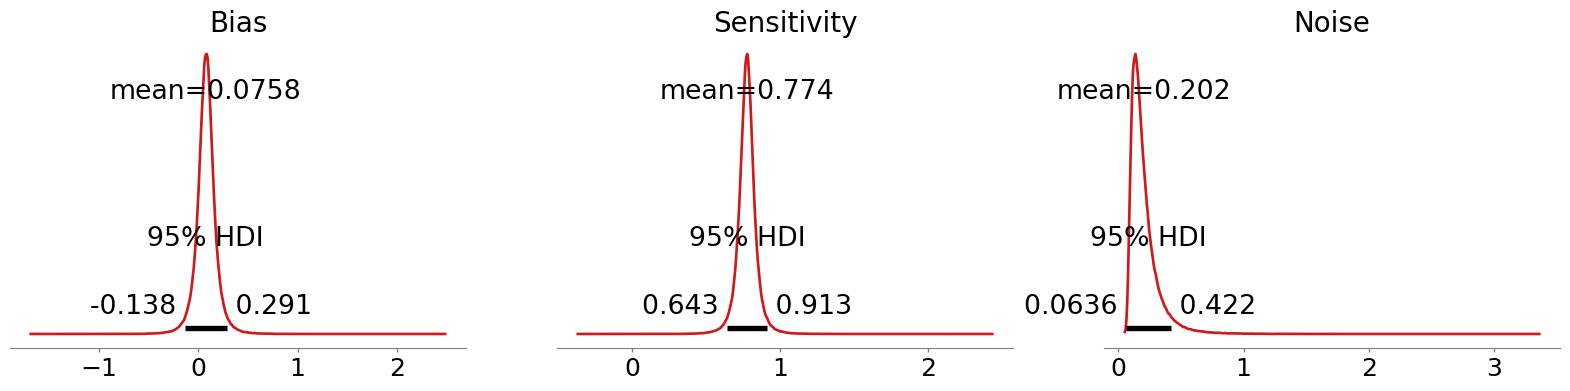

In [125]:
axes = az.plot_posterior(fit_time, var_names=para_list_names_time, figsize=(20, 4), kind='kde',
                        hdi_prob=0.95, textsize=18, point_estimate='mean', 
                        round_to=3, color = "#CF191A");

axes[0].set_title("Bias", size=20)
axes[1].set_title("Sensitivity", size=20)
axes[2].set_title("Noise", size=20)
plt.savefig(dir + "Posterior_Distributions_Time.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

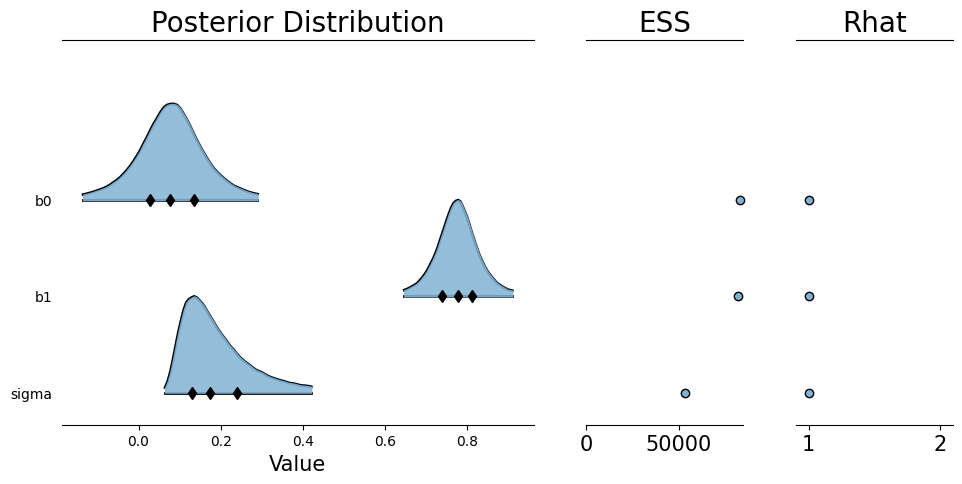

In [126]:
axes = az.plot_forest(fit_time, var_names=para_list_names_time, 
                      figsize=(11.5, 5), kind='ridgeplot', colors = '#81B2D4', 
                      ess=True, r_hat=True, combined=True, ridgeplot_overlap=1.35, 
                      textsize=15, hdi_prob=0.95, quartiles=True, linewidth=2, 
                      markersize=6, legend=True, ridgeplot_alpha= 0.85, 
                      ridgeplot_quantiles=[0.25, 0.5, 0.75], ridgeplot_truncate=True)

axes[0].set_title('Posterior Distribution', fontsize=20)
axes[0].set_xlabel('Value', fontsize=15)
axes[1].set_title('ESS', fontsize=20)
axes[2].set_title('Rhat', fontsize=20)

plt.savefig(dir + "Posterior_Distributions_and_statistics_Time.png", 
            dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

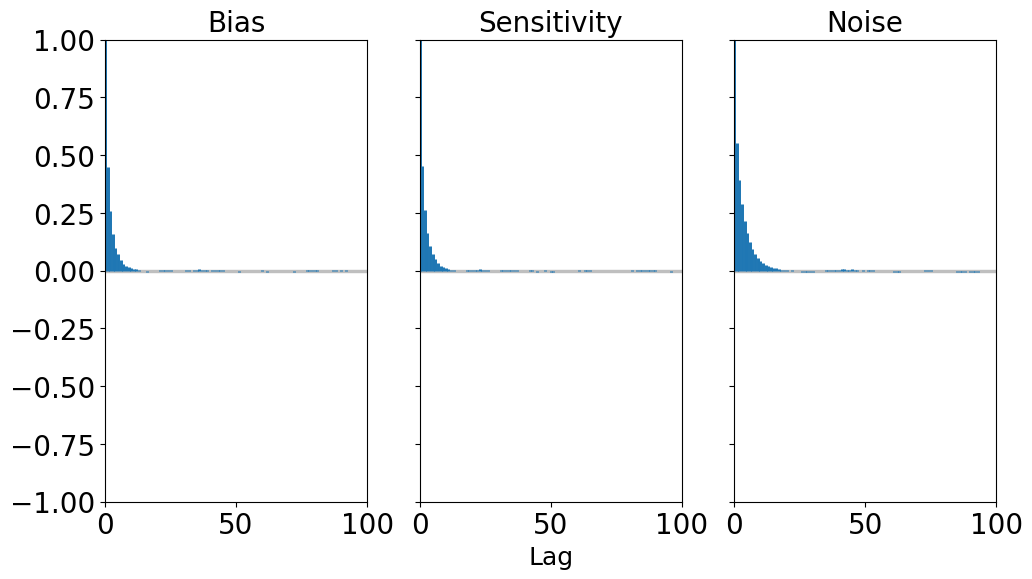

In [119]:
axes = az.plot_autocorr(fit_time, var_names=para_list_names_time, figsize=(11.5, 6),
                         combined=True, textsize=20, max_lag=100);

axes[0].set_title('Bias', fontsize=20)
axes[1].set_title('Sensitivity', fontsize=20)
axes[2].set_title('Noise', fontsize=20)
axes[1].set_xlabel('Lag', fontsize=18)

plt.savefig(dir + "Autocorrelation_time_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

/home/quicho/Escritorio/Pigeons_Figures/anaenv/lib/python3.11/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


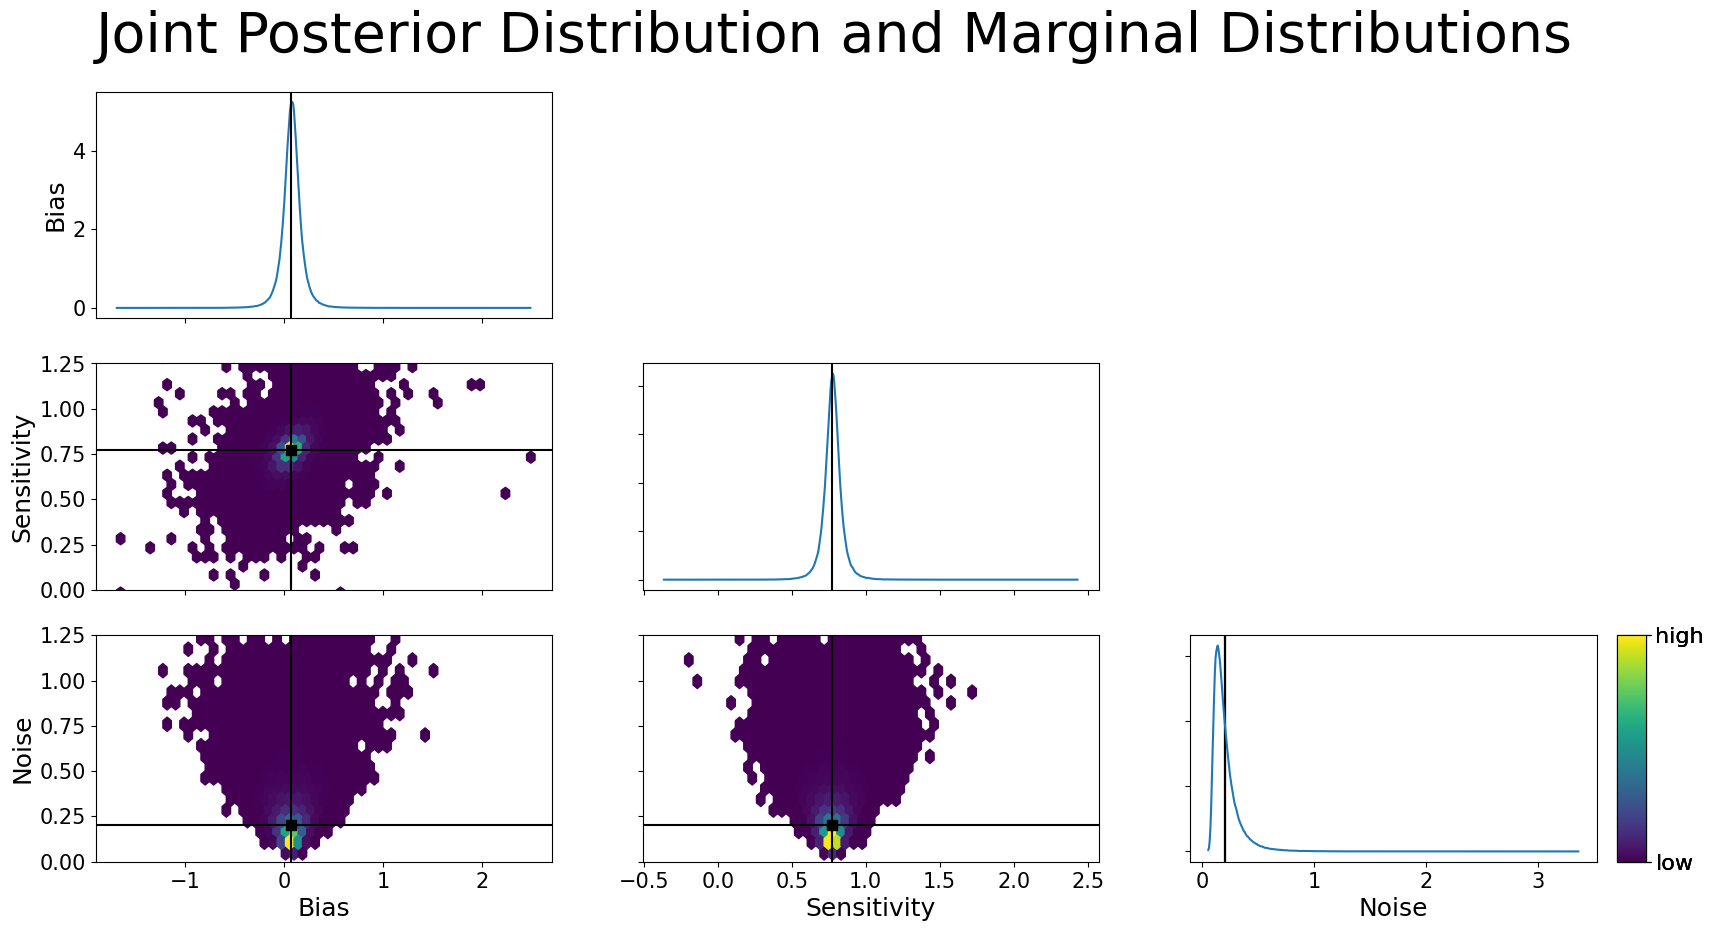

In [122]:
axes = az.plot_pair(fit_time, var_names=para_list_names_time, figsize=(20, 10), 
                    divergences=True, kind='hexbin', textsize=15, colorbar=True, point_estimate='mean', marginals=True)

axes[1, 0].set_ylim(0, 1.25)
axes[2, 0].set_ylim(0, 1.25)
axes[0,0].set_title("Joint Posterior Distribution and Marginal Distributions", fontsize=40, pad=20, loc = "left", verticalalignment="bottom")
axes[0, 0].set_ylabel('Bias', fontsize=18)
axes[1, 0].set_ylabel('Sensitivity', fontsize=18)
axes[2, 0].set_ylabel('Noise', fontsize=18)
axes[2, 0].set_xlabel('Bias', fontsize=18)
axes[2, 1].set_xlabel('Sensitivity', fontsize=18)
axes[2, 2].set_xlabel('Noise', fontsize=18)

plt.savefig(dir + "Joint_Posterior_Distribution_and_Marginal_Distributions_Time.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Posterior Predictive Checks

In [136]:
print("Response Parameters", "\n")
bayes[['b0', 'b1', 'sigma']].describe().T

Response Parameters 



,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
b0,280000.0,0.257665,0.122117,-1.869535,0.197611,0.257522,0.317865,2.335131
b1,280000.0,0.751711,0.077351,-0.170579,0.713769,0.751590,0.789700,2.006142
sigma,280000.0,0.229003,0.132929,0.057628,0.146686,0.193733,0.268572,3.606905


In [137]:
print("Time Parameters", "\n")
bayes_time[['b0', 'b1', 'sigma']].describe().T

Time Parameters 



,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
b0,280000.0,0.075812,0.108023,-1.690452,0.022810,0.075760,0.128425,2.490391
b1,280000.0,0.773583,0.068211,-0.367433,0.740265,0.773544,0.806505,2.433722
sigma,280000.0,0.201994,0.122291,0.048480,0.127547,0.169812,0.236819,3.362190


In [140]:
b0 = bayes["b0"].to_numpy()
b1 = bayes["b1"].to_numpy()
samples = 80

np.random.seed(140801)
b0_samples = np.random.choice(b0, size=samples, replace=False)
np.random.seed(140801)
b1_samples = np.random.choice(b1, size=samples, replace=False)

b0_hdi = az.hdi(b0, hdi_prob=0.95)
b1_hdi = az.hdi(b1, hdi_prob=0.95)

In [141]:
b0_time = bayes_time["b0"].to_numpy()
b1_time = bayes_time["b1"].to_numpy()

np.random.seed(140801)
b0_samples_time = np.random.choice(b0_time, size=samples, replace=False)
np.random.seed(140801)
b1_samples_time = np.random.choice(b1_time, size=samples, replace=False)

b0_hdi_time = az.hdi(b0_time, hdi_prob=0.95)
b1_hdi_time = az.hdi(b1_time, hdi_prob=0.95)

In [142]:
x_hat = np.linspace(-2.5, 1.5, 10000)
y_hat = x_hat * b1_samples[:, None] + b0_samples[:, None]
y_hat_time = x_hat * b1_samples_time[:, None] + b0_samples_time[:, None]

In [186]:
# PLot colors
sample_color = "#DF96B4"
hdi_color = "#717171"
data_color = "#244B7A"
alpha_samples = 0.4

sample_color_time = "#B0DB61"
hdi_color_time = "#FF0000"
data_color_time = "#2B5C8A"
alpha_samples_time = 0.4

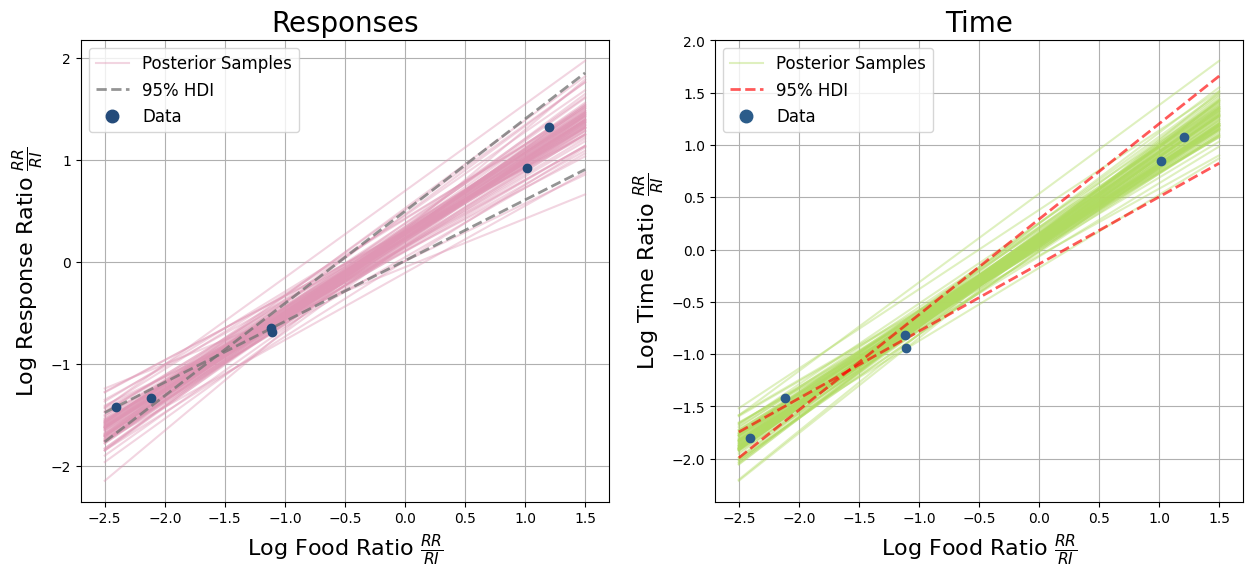

In [188]:
fig, ax = plt.subplots(figsize = (15, 6), ncols=2, nrows=1)

# Plot Response
################################################################################################################################################################################################################################################################################################
# Plot Posterior samples
for i in range(samples-1):
    ax[0].plot(x_hat, y_hat[i], alpha=alpha_samples, color = sample_color)
ax[0].plot(x_hat, y_hat[-1], alpha=alpha_samples, color = sample_color, label = r"Posterior Samples")

# Plot Posterior 95% HDI
ax[0].plot(x_hat, x_hat * b1_hdi[0] + b0_hdi[0], '--', alpha = 0.75, color = hdi_color, 
        lw = 2, label = r"95% HDI")
ax[0].plot(x_hat, x_hat * b1_hdi[1] + b0_hdi[1], '--', alpha = 0.75, color = hdi_color, 
        lw = 2)

# PLot Data
ax[0].plot(list_rewards, response_reinforcers_21_30, 'o', alpha = 1, color = data_color, label = r"Data")


ax[0].grid()

ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Responses", fontsize=20)
ax[0].legend(markerscale=1.5, fontsize=12)

# Plot TIme
################################################################################################################################################################################################################################################################################################

# Plot Posterior samples
for i in range(samples-1):
    ax[1].plot(x_hat, y_hat_time[i], alpha=alpha_samples, color = sample_color_time)
ax[1].plot(x_hat, y_hat_time[-1], alpha=alpha_samples, color = sample_color_time, 
           label = r"Posterior Samples")

# Plot Posterior 95% HDI
ax[1].plot(x_hat, x_hat * b1_hdi_time[0] + b0_hdi_time[0], '--', 
           alpha = 0.65, color = hdi_color_time,  lw = 2, label = r"95% HDI")
ax[1].plot(x_hat, x_hat * b1_hdi_time[1] + b0_hdi_time[1], '--', 
           alpha = 0.65, color = hdi_color_time, lw = 2)

# PLot Data
ax[1].plot(list_rewards, time_reinforcers_21_30, 'o', alpha = 1, color = data_color_time, 
           label = r"Data")


ax[1].grid()

ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Time", fontsize=20)
ax[1].legend(markerscale=1.5, fontsize=12)


plt.savefig(dir + "Predictive_Posterior_Checking_2022.png", dpi = 300, 
            bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close(fig)